# -- COVID-19 Insights and Analysis Project --

**Project Description:**

This project presents a comprehensive analysis of COVID-19 data in India, covering state-wise trends in confirmed cases, recoveries, deaths, and vaccination progress. Using Python and Plotly, interactive visualizations and KPIs were developed to uncover insights.

##1) Data Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime


In [ ]:
from google.colab import files
files.upload()

In [ ]:
# Load Data
df_covid = pd.read_csv('covid_19_india.csv')
df_vaccine = pd.read_csv('covid_vaccine_statewise.csv')

# Preview data
print(df_covid.shape)
print(df_vaccine.shape)

(15114, 9)
(7845, 24)


In [ ]:
df_covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [ ]:
df_vaccine.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


##2) Data Cleaning & Preprocessing

In [ ]:
# Check for null values
df_covid.isnull().sum()

,0
Sno,0
Date,0
Time,0
State/UnionTerritory,0
ConfirmedIndianNational,0
ConfirmedForeignNational,0
Cured,0
Deaths,0
Confirmed,0


In [ ]:
# Drop null values
df_covid.dropna(inplace= True)
df_covid.isna().sum()

,0
Sno,0
Date,0
Time,0
State/UnionTerritory,0
ConfirmedIndianNational,0
ConfirmedForeignNational,0
Cured,0
Deaths,0
Confirmed,0


In [ ]:
# Drop unwanted columns
df_covid.drop(['Sno', 'Time','ConfirmedIndianNational', 'ConfirmedForeignNational'], inplace = True , axis = 1)   # Drop unwanted columns

In [ ]:
# Check Datatype
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15086 entries, 0 to 15085
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  15086 non-null  object 
 1   State/UnionTerritory  15086 non-null  object 
 2   Cured                 15086 non-null  float64
 3   Deaths                15086 non-null  float64
 4   Confirmed             15086 non-null  float64
dtypes: float64(3), object(2)
memory usage: 707.2+ KB


In [ ]:
# Change respected Datatypes
df_covid = df_covid.astype({'Date' : 'datetime64[ns]' , 'Cured' : 'int' , 'Deaths' :  'int' , 'Confirmed' : 'int'})    # Change Datatypes
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15086 entries, 0 to 15085
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  15086 non-null  datetime64[ns]
 1   State/UnionTerritory  15086 non-null  object        
 2   Cured                 15086 non-null  int64         
 3   Deaths                15086 non-null  int64         
 4   Confirmed             15086 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 707.2+ KB


In [ ]:
# Chnage columns name (if necessary)
df_covid.rename(columns = {'State/UnionTerritory' : 'State'}, inplace = True)
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15086 entries, 0 to 15085
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       15086 non-null  datetime64[ns]
 1   State      15086 non-null  object        
 2   Cured      15086 non-null  int64         
 3   Deaths     15086 non-null  int64         
 4   Confirmed  15086 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 707.2+ KB


In [ ]:
# Chnage columns name (if necessary)
df_vaccine.rename(columns = {'Updated On' : 'Vaccination_Date'}, inplace = True)
df_vaccine['Vaccination_Date'] = pd.to_datetime(df_vaccine['Vaccination_Date'])
df_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Vaccination_Date                     7845 non-null   datetime64[ns]
 1   State                                7845 non-null   object        
 2   Total Doses Administered             7621 non-null   float64       
 3   Sessions                             7621 non-null   float64       
 4    Sites                               7621 non-null   float64       
 5   First Dose Administered              7621 non-null   float64       
 6   Second Dose Administered             7621 non-null   float64       
 7   Male (Doses Administered)            7461 non-null   float64       
 8   Female (Doses Administered)          7461 non-null   float64       
 9   Transgender (Doses Administered)     7461 non-null   float64       
 10   Covaxin (Do

<ipython-input-62-bf3e4f5fed94>:3: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



##3) Exploratory Data Analysis (EDA)

###3.1) Non-Graphical EDA Operations

In [ ]:
# Check Null Values & Percent Missing

print("Vaccine data shape:", df_vaccine.shape)
missing_vaccine = df_vaccine.isnull().sum()
print("Missing values in Vaccine data:\n", missing_vaccine)
print('---------------------------------')
print("Percent missing in Vaccine data:\n", (missing_vaccine / len(df_vaccine)) * 100)

Vaccine data shape: (7845, 24)
Missing values in Vaccine data:
 Vaccination_Date                          0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Indiv

In [ ]:
# Unique Values & Cardinality

print("Unique states in COVID data:", df_covid['State'].nunique())
print("Unique states in Vaccine data:", df_vaccine['State'].nunique())
print("Unique Dates in COVID data:", df_covid['Date'].nunique())
print("Unique Vaccination Dates:", df_vaccine['Vaccination_Date'].nunique())

Unique states in COVID data: 40
Unique states in Vaccine data: 37
Unique Dates in COVID data: 476
Unique Vaccination Dates: 213


In [ ]:
df_covid.describe()

,Date,Cured,Deaths,Confirmed
count,15086,1.508600e+04,15086.000000,1.508600e+04
mean,2020-10-19 11:54:27.824472832,1.747937e+05,2721.084449,1.942820e+05
min,2020-01-30 00:00:00,0.000000e+00,0.000000,0.000000e+00
25%,2020-07-05 00:00:00,1.685000e+03,12.000000,2.935500e+03
50%,2020-10-21 00:00:00,1.964700e+04,364.000000,2.608150e+04
75%,2021-02-04 00:00:00,2.087552e+05,2170.000000,2.216012e+05
max,2021-05-19 00:00:00,4.927480e+06,83777.000000,5.433506e+06
std,NaN,3.648330e+05,7182.672358,4.095184e+05


In [ ]:
df_vaccine.describe()

,Vaccination_Date,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
count,7845,7.621000e+03,7.621000e+03,7621.000000,7.621000e+03,7.621000e+03,7.461000e+03,7.461000e+03,7461.000000,7.621000e+03,...,1.702000e+03,1.702000e+03,1.702000e+03,3.733000e+03,3.734000e+03,3.734000e+03,1.600000e+02,1.600000e+02,160.000000,5.919000e+03
mean,2021-05-01 12:19:32.925430528,9.188171e+06,4.792358e+05,2282.872064,7.414415e+06,1.773755e+06,3.620156e+06,3.168416e+06,1162.978019,1.044669e+06,...,8.773958e+06,7.442161e+06,5.641605e+06,1.395895e+06,2.916515e+06,2.627444e+06,4.461687e+07,3.951018e+07,12370.543750,4.547842e+06
min,2021-01-16 00:00:00,7.000000e+00,0.000000e+00,0.000000,7.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000,0.000000e+00,...,2.662400e+04,1.681500e+04,9.994000e+03,1.059000e+03,1.136000e+03,5.580000e+02,2.375700e+04,2.451700e+04,2.000000,7.000000e+00
25%,2021-03-10 00:00:00,1.356570e+05,6.004000e+03,69.000000,1.166320e+05,1.283100e+04,5.655500e+04,5.210700e+04,8.000000,0.000000e+00,...,4.344842e+05,2.326275e+05,1.285605e+05,5.655400e+04,9.248225e+04,5.615975e+04,5.739350e+06,5.023407e+06,1278.750000,7.427550e+04
50%,2021-05-02 00:00:00,8.182020e+05,4.547000e+04,597.000000,6.614590e+05,1.388180e+05,3.897850e+05,3.342380e+05,113.000000,1.185100e+04,...,3.095970e+06,2.695938e+06,1.805696e+06,2.947270e+05,8.330395e+05,7.887425e+05,3.716590e+07,3.365402e+07,8007.500000,4.022880e+05
75%,2021-06-24 00:00:00,6.625243e+06,3.428690e+05,1708.000000,5.387805e+06,1.166434e+06,2.735777e+06,2.561513e+06,800.000000,7.579300e+05,...,7.366241e+06,6.969726e+06,5.294763e+06,9.105160e+05,2.499280e+06,2.337874e+06,7.441663e+07,6.685368e+07,19851.000000,3.501562e+06
max,2021-08-16 00:00:00,5.132284e+08,3.501031e+07,73933.000000,4.001504e+08,1.130780e+08,2.701636e+08,2.395186e+08,98275.000000,6.236742e+07,...,2.243304e+08,1.667575e+08,1.186927e+08,9.224315e+07,9.096888e+07,6.731098e+07,1.349420e+08,1.156684e+08,46462.000000,2.506569e+08
std,NaN,3.746180e+07,1.911511e+06,7275.973730,2.995209e+07,7.570382e+06,1.737938e+07,1.515310e+07,5931.353995,4.452259e+06,...,2.660829e+07,2.225999e+07,1.681650e+07,5.501454e+06,9.567607e+06,8.192225e+06,3.950749e+07,3.417684e+07,12485.026753,1.834182e+07


### 3.2) Graphical EDA Operations

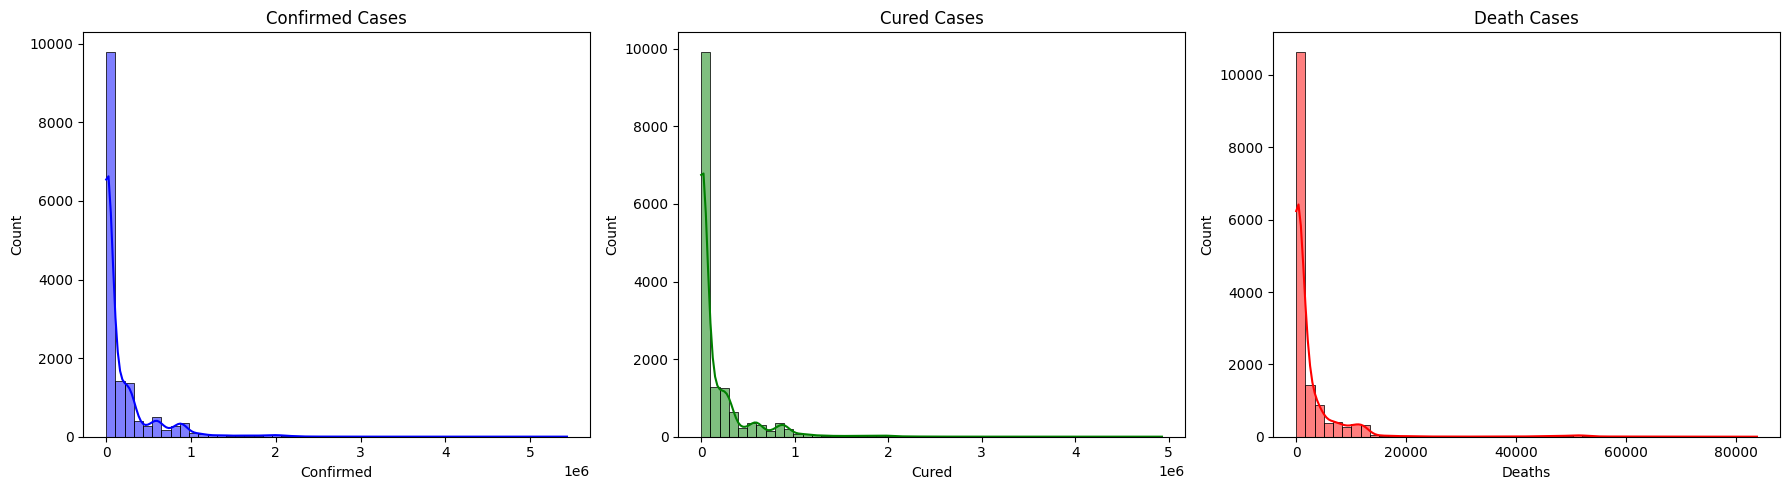

In [ ]:
# Distribution of Data
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# Plot 1: Confirmed
sns.histplot(df_covid['Confirmed'], bins=50, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Confirmed Cases')

# Plot 2: Cured
sns.histplot(df_covid['Cured'], bins=50, kde=True, ax=axes[1], color='green')
axes[1].set_title('Cured Cases')

# Plot 3: Deaths
sns.histplot(df_covid['Deaths'], bins=50, kde=True, ax=axes[2], color='red')
axes[2].set_title('Death Cases')

plt.tight_layout()
plt.show()

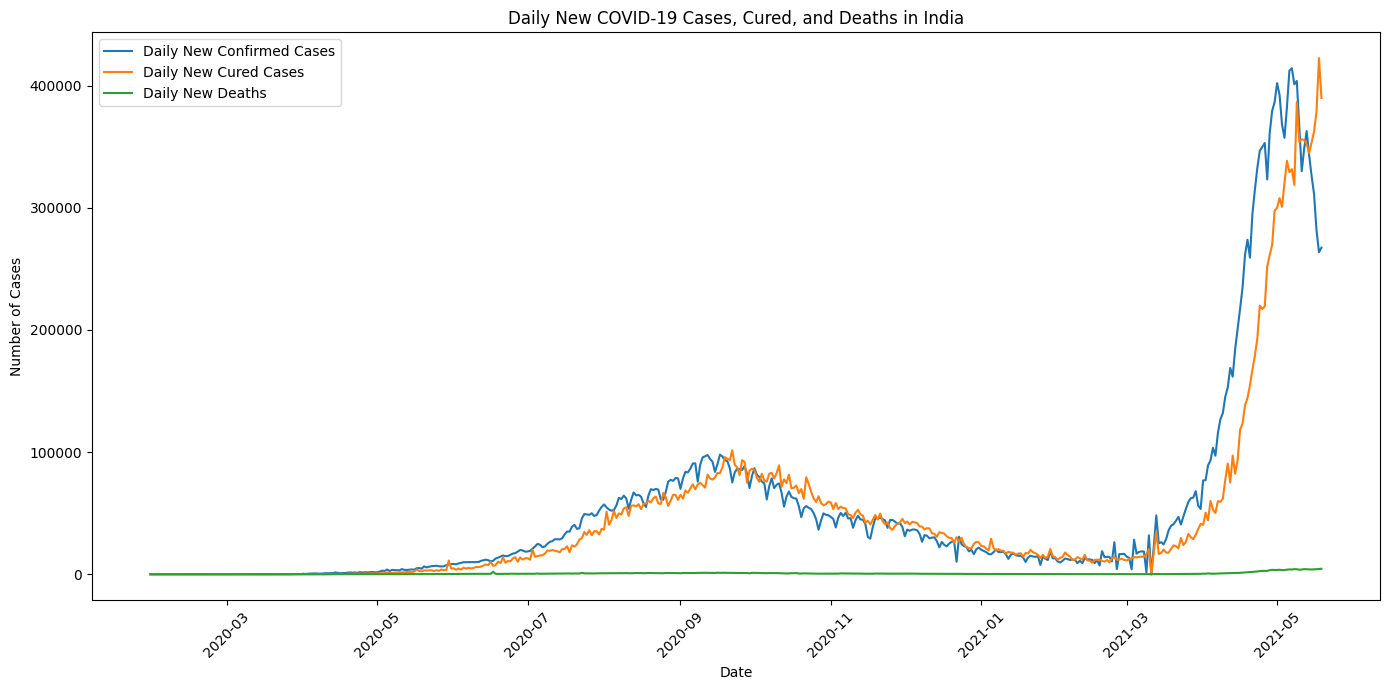

In [ ]:
# Trend of Daily Confirmed Cases Nationwide
plt.figure(figsize=(14,7))

# Group by Date, sum for Confirmed, Cured, Deaths, then take diff to get daily new data
daily_data = df_covid.groupby('Date')[['Confirmed', 'Cured', 'Deaths']].sum().diff().fillna(0)

# Plot all lines directly
plt.plot(daily_data.index, daily_data['Confirmed'], label='Daily New Confirmed Cases')
plt.plot(daily_data.index, daily_data['Cured'], label='Daily New Cured Cases')
plt.plot(daily_data.index, daily_data['Deaths'], label='Daily New Deaths')

plt.title('Daily New COVID-19 Cases, Cured, and Deaths in India')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

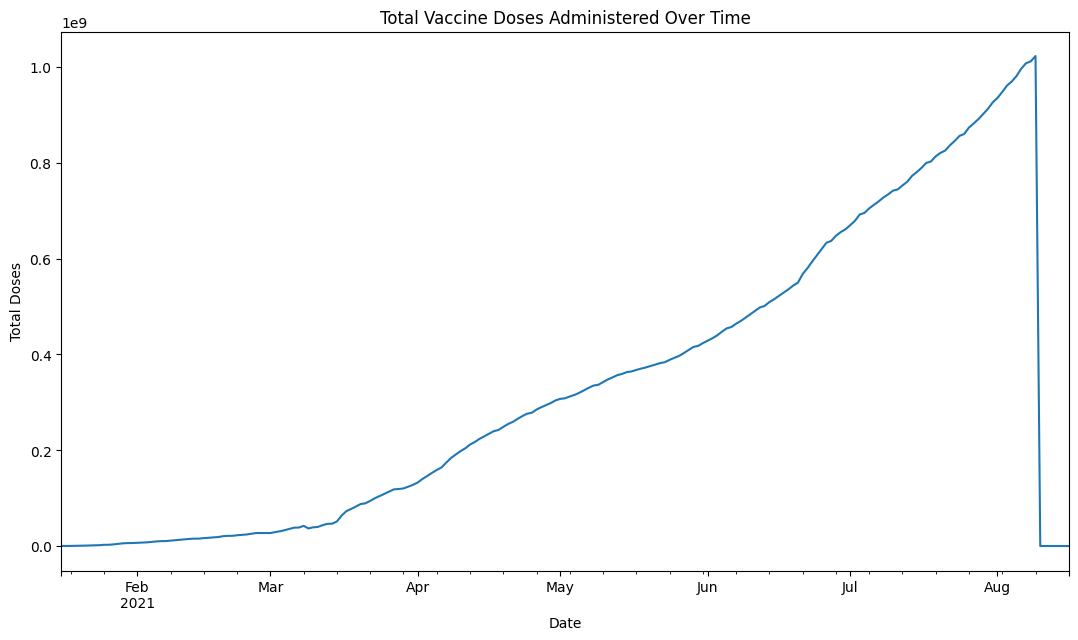

In [ ]:
# Vaccination Dose Distribution Over Time
plt.figure(figsize=(13,7))
df_vaccine.groupby('Vaccination_Date')['Total Doses Administered'].sum().plot(kind='line')
plt.title('Total Vaccine Doses Administered Over Time')
plt.xlabel('Date')
plt.ylabel('Total Doses')
plt.show()

## 4) Importatnt KPIs

In [ ]:
# Daily New Cases per State:
df_covid['New Cases'] = df_covid.groupby('State')['Confirmed'].diff().fillna(0)


In [ ]:
# Active Cases date wise

df_covid['Active_Cases'] = df_covid['Confirmed'] - ( df_covid['Cured'] + df_covid['Deaths'])
df_covid.tail()

,Date,State,Cured,Deaths,Confirmed,New Cases,Active_Cases
15081,2021-05-19,Telangana,485644,3012,536766,3982.0,48110
15082,2021-05-19,Tripura,36402,450,42776,879.0,5924
15083,2021-05-19,Uttarakhand,214426,5132,295790,4785.0,76232
15084,2021-05-19,Uttar Pradesh,1483249,18072,1637663,8673.0,136342
15085,2021-05-19,West Bengal,1026492,13576,1171861,19428.0,131793


In [ ]:
# Pivot Table -
# Recovery Rate and Mortality Rate
pivot_statewise = pd.pivot_table(df_covid , values = ['Confirmed', 'Deaths' , 'Cured'], index = 'State' , aggfunc = max)
pivot_statewise['Recovery Rate'] =  pivot_statewise['Cured']/pivot_statewise['Confirmed'] * 100
pivot_statewise['Mortality Rate'] =  pivot_statewise['Deaths']/pivot_statewise['Confirmed'] * 100
pivot_statewise = pivot_statewise.sort_values(by = 'Confirmed', ascending= False)
pivot_statewise.head()

<ipython-input-121-a7a3488a8991>:3: FutureWarning:

The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.



,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State,,,,,
Maharashtra,5433506,4927480,83777,90.686934,1.541859
Karnataka,2272374,1674487,22838,73.688882,1.005028
Kerala,2200706,1846105,6612,83.886944,0.300449
Tamil Nadu,1664350,1403052,18369,84.300297,1.103674
Uttar Pradesh,1637663,1483249,18072,90.571076,1.103524


In [ ]:
# Vaccination Completion Rate:
df_vaccine['Vaccination Completion Rate'] = df_vaccine['Second Dose Administered'] / df_vaccine['Total Individuals Vaccinated']

In [ ]:
# AEFI Rate (Adverse Events Following Immunization)
df_vaccine['AEFI Rate'] = df_vaccine['AEFI'] / df_vaccine['Total Doses Administered']

## 5) Data Visualization

### a) Recovery Rate and Mortality Rate Visualization

In [ ]:
# Pivot table visualization of Recovery Rate and Mortality Rate
pivot_statewise.style.background_gradient(cmap= 'Blues' )

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State,,,,,
Maharashtra,5433506,4927480,83777,90.686934,1.541859
Karnataka,2272374,1674487,22838,73.688882,1.005028
Kerala,2200706,1846105,6612,83.886944,0.300449
Tamil Nadu,1664350,1403052,18369,84.300297,1.103674
Uttar Pradesh,1637663,1483249,18072,90.571076,1.103524
Andhra Pradesh,1475372,1254291,9580,85.015237,0.649328
Delhi,1402873,1329899,22111,94.798246,1.576123
West Bengal,1171861,1026492,13576,87.595030,1.158499
Chhattisgarh,925531,823113,12036,88.934136,1.300443


### b) Top 10 Active Cases States

In [ ]:
 # Top 10 Active Cases States
top_10_active= df_covid.groupby(by = 'State')['Active_Cases'].max().sort_values(ascending =  False).head(10).reset_index()
top_10_active.head(10)

,State,Active_Cases
0,Maharashtra,701614
1,Karnataka,605515
2,Kerala,445692
3,Uttar Pradesh,310783
4,Tamil Nadu,242929
5,Rajasthan,212753
6,Andhra Pradesh,211554
7,Gujarat,148297
8,West Bengal,131948
9,Chhattisgarh,131245


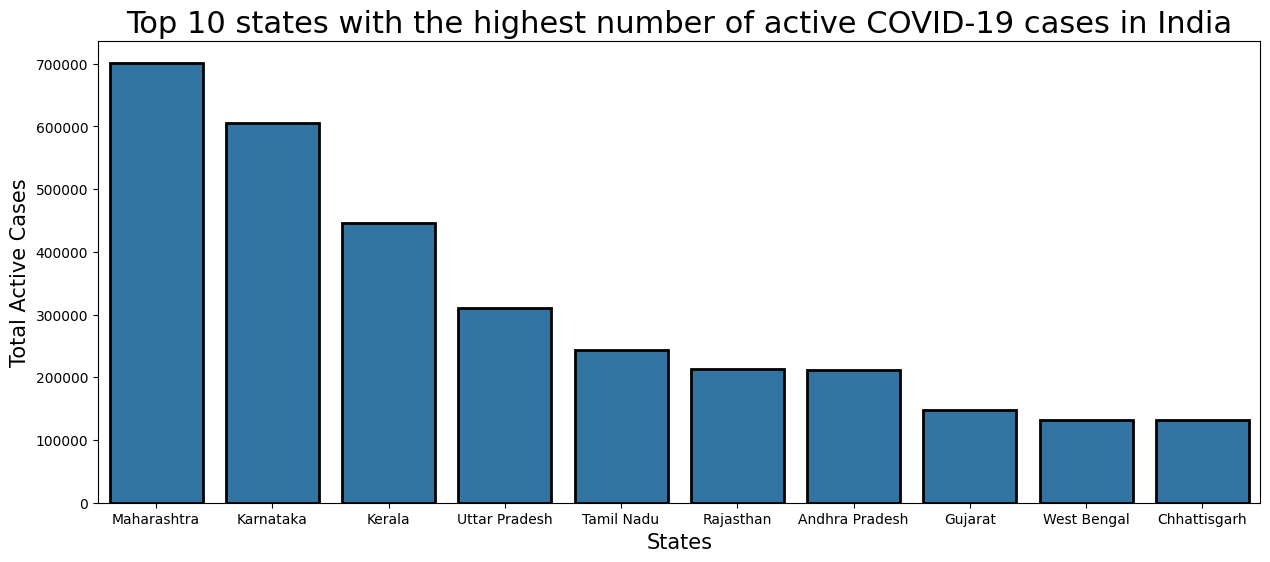

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Top 10 states with the highest number of active COVID-19 cases in India', size = 22)
ax = sns.barplot(data = top_10_active, y = 'Active_Cases' , x = 'State'  , linewidth = 2 ,  edgecolor= 'black')
plt.xlabel('States',size =  15)
plt.ylabel('Total Active Cases' ,size =  15 )
plt.show()

### c) Top 10 States with hightest deaths reported

In [ ]:
# Top States with hightest deaths reported

top_10_death = df_covid.groupby(by = 'State')['Deaths'].max().sort_values(ascending =False).head(10).reset_index()
top_10_death

,State,Deaths
0,Maharashtra,83777
1,Karnataka,22838
2,Delhi,22111
3,Tamil Nadu,18369
4,Uttar Pradesh,18072
5,West Bengal,13576
6,Punjab,12317
7,Chhattisgarh,12036
8,Andhra Pradesh,9580
9,Gujarat,9269


<ipython-input-132-7096de3c2f14>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




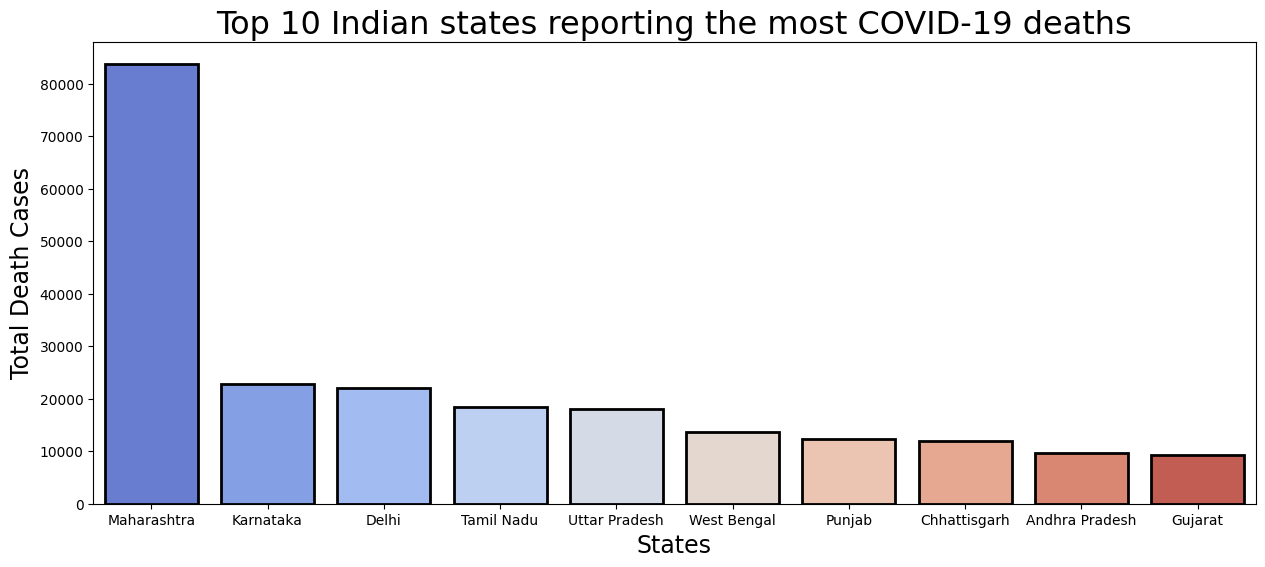

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Top 10 Indian states reporting the most COVID-19 deaths', size = 23)
ax = sns.barplot(data = top_10_death, y = 'Deaths' , x = 'State' , palette= 'coolwarm' , linewidth = 2 ,  edgecolor= 'black')
plt.xlabel('States',size =  17)
plt.ylabel('Total Death Cases' ,size =  17 )
plt.show()

### d) Active Cases Growth over a time

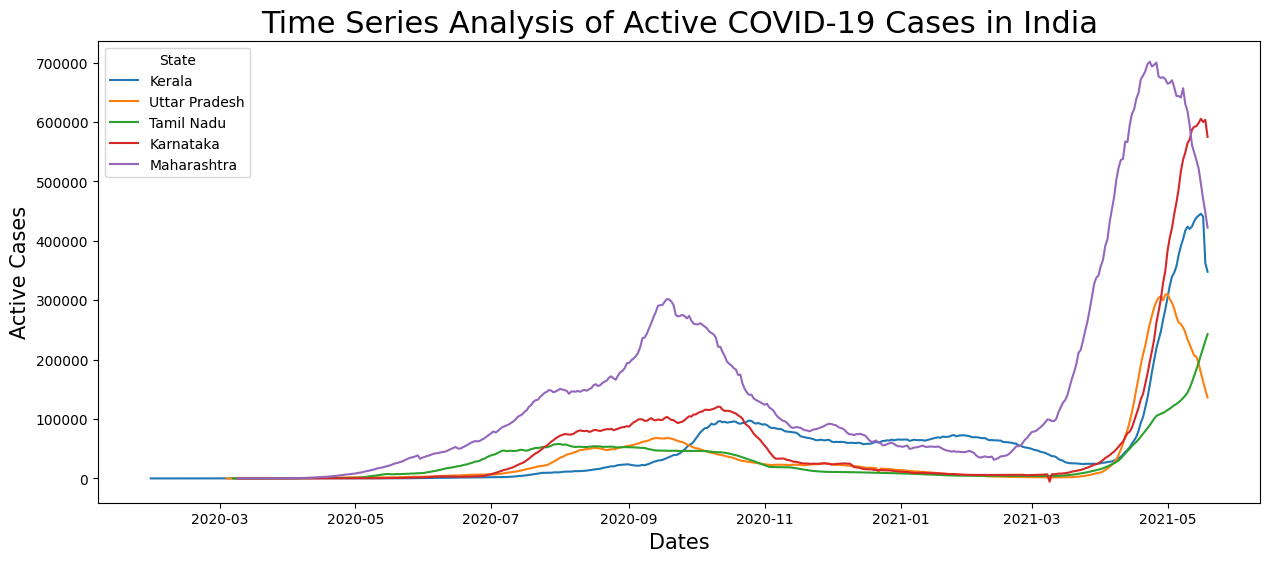

In [ ]:
# Growth Trend
plt.figure(figsize=(15,6))
plt.title('Time Series Analysis of Active COVID-19 Cases in India', size = 22)
ax = sns.lineplot(data = df_covid[df_covid['State'].isin(['Maharashtra', 'Karnataka', 'Kerala', 'Uttar Pradesh' , 'Tamil Nadu'])] ,
                 y = 'Active_Cases' , x = 'Date' , hue  = 'State')
plt.xlabel('Dates',size =  15)
plt.ylabel('Active Cases' ,size =  15 )
plt.show()

### e) Bubble Chart : Impact vs Vaccination

In [ ]:
# Merge case and vaccine data on State
case_data = df_covid.groupby('State')[['Confirmed', 'Deaths']].max().reset_index()
vaccine_data = df_vaccine.groupby('State')[['Total Doses Administered']].max().reset_index()

merged = pd.merge(case_data, vaccine_data, left_on='State', right_on='State', how='inner')

fig = px.scatter(
    merged,
    x='Confirmed',
    y='Deaths',
    size='Total Doses Administered',
    color='State',
    hover_name='State',
    title='COVID-19 Impact vs Vaccination Outreach by State',
    size_max=60
)

fig.show()

### f) Vaccination by Age Group

In [ ]:
age_cols = [
    '18-44 Years (Doses Administered)',
    '45-60 Years (Doses Administered)',
    '60+ Years (Doses Administered)'
]
age_data = df_vaccine[age_cols].sum().reset_index()
age_data.columns = ['Age Group', 'Total Vaccinated']

fig = px.bar(
    age_data,
    x='Age Group',
    y='Total Vaccinated',
    title='Vaccination by Age Group in India',
    text='Total Vaccinated',
    color='Age Group'
)
fig.show()

### g) Vaccine Type Distribution

In [ ]:
fig = px.pie(
    names=['Covaxin', 'Covishield', 'Sputnik V'],
    values=[
        df_vaccine[' Covaxin (Doses Administered)'].sum(),
        df_vaccine['CoviShield (Doses Administered)'].sum(),
        df_vaccine['Sputnik V (Doses Administered)'].sum()
    ],
    title='COVID-19 Vaccine Type Distribution in India'
)
fig.show()

### h) Vaccination by Gender

In [ ]:
gender_totals = {
    'Male': df_vaccine['Male (Doses Administered)'].sum(),
    'Female': df_vaccine['Female (Doses Administered)'].sum()
}

fig = px.bar(x=list(gender_totals.keys()), y=list(gender_totals.values()),
             labels={'x': 'Gender', 'y': 'Doses Administered'},
             title='Vaccine Doses Administered by Gender')
fig.show()

In [ ]:
daily_new_cases = df_covid.groupby('Date')['New Cases'].sum().reset_index()

fig = px.bar(daily_new_cases, x='Date', y='New Cases',
             title='New Daily COVID-19 Cases in India')
fig.show()